In [1]:
import numpy as np
import pandas as pd

In [2]:
metropolitan_dataset = pd.read_csv('Standard Metropolitan Areas Data - train_data - data.csv')
metropolitan_dataset.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


In [3]:
metropolitan_dataset.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [4]:
metropolitan_dataset.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

<AxesSubplot:>

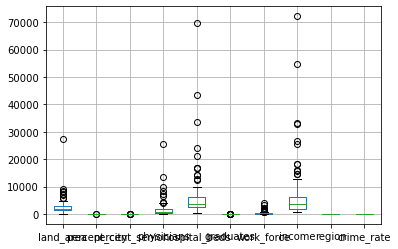

In [18]:
metropolitan_dataset.boxplot()

In [19]:
def replace(data):
    for x in data:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        data.loc[data[x] < min,x] = np.nan
        data.loc[data[x] > max,x] = np.nan


In [20]:
replace(metropolitan_dataset)
metropolitan_dataset.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,91.000000,97.000000,95.000000,91.000000,87.000000,93.000000,85.000000,87.000000,99.000000,99.000000
mean,1979.813187,41.428866,9.545263,1114.593407,3813.655172,54.193548,256.360000,3757.609195,2.494949,55.643030
std,1033.125311,15.730014,1.735105,959.865037,2219.560059,6.477802,151.221319,2552.468310,1.013921,13.470943
min,47.000000,13.400000,6.000000,140.000000,481.000000,38.800000,66.900000,769.000000,1.000000,23.320000
25%,1388.000000,29.900000,8.350000,441.000000,2120.000000,50.400000,138.600000,1959.500000,2.000000,46.115000
50%,1750.000000,39.200000,9.700000,751.000000,3215.000000,54.000000,212.600000,2962.000000,3.000000,56.060000
75%,2621.000000,51.100000,10.650000,1514.000000,5276.000000,57.800000,318.500000,4476.000000,3.000000,63.860000
max,4647.000000,80.600000,13.400000,4047.000000,9976.000000,68.300000,710.400000,12591.000000,4.000000,85.620000


<AxesSubplot:>

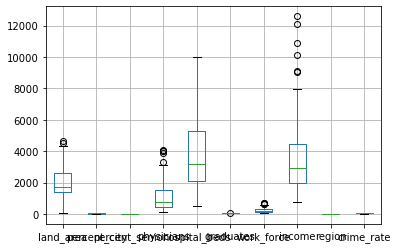

In [21]:
metropolitan_dataset.boxplot()

In [26]:
metropolitan_dataset.isnull().sum()

land_area          8
percent_city       2
percent_senior     4
physicians         8
hospital_beds     12
graduates          6
work_force        14
income            12
region             0
crime_rate         0
dtype: int64

In [28]:
metropolitan_numeric = metropolitan_dataset.select_dtypes(include=[np.number])
numeric_cols = metropolitan_numeric.columns.values

for col in numeric_cols:
    missing =metropolitan_dataset[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        med = metropolitan_dataset[col].median()
        metropolitan_dataset[col] = metropolitan_dataset[col].fillna(med)

In [30]:
metropolitan_dataset.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

In [31]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
y = metropolitan_dataset['crime_rate']
col_name = metropolitan_dataset.drop('crime_rate', axis = 1).columns[:]
x = metropolitan_dataset.loc[:, col_name]
# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

print(metropolitan_dataset.head())
x.head()

   land_area  percent_city  percent_senior  physicians  hospital_beds  \
0     1384.0          78.1            12.3       751.0         3215.0   
1     3719.0          43.9             9.4       751.0         3215.0   
2     3553.0          37.4            10.7       751.0         3215.0   
3     3916.0          29.9             8.8       751.0         3215.0   
4     2480.0          31.5            10.5       751.0         3215.0   

   graduates  work_force  income  region  crime_rate  
0       50.1       212.6  2962.0     1.0       75.55  
1       53.9       212.6  2962.0     2.0       56.03  
2       50.6       212.6  2962.0     1.0       41.32  
3       52.2       212.6  2962.0     2.0       67.38  
4       66.1       212.6  2962.0     4.0       80.19  


,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
0,0.290652,0.962798,0.851351,0.156386,0.287941,0.383051,0.226418,0.185502,0.000000
1,0.798261,0.453869,0.459459,0.156386,0.287941,0.511864,0.226418,0.185502,0.333333
2,0.762174,0.357143,0.635135,0.156386,0.287941,0.400000,0.226418,0.185502,0.000000
3,0.841087,0.245536,0.378378,0.156386,0.287941,0.454237,0.226418,0.185502,0.333333
4,0.528913,0.269345,0.608108,0.156386,0.287941,0.925424,0.226418,0.185502,1.000000


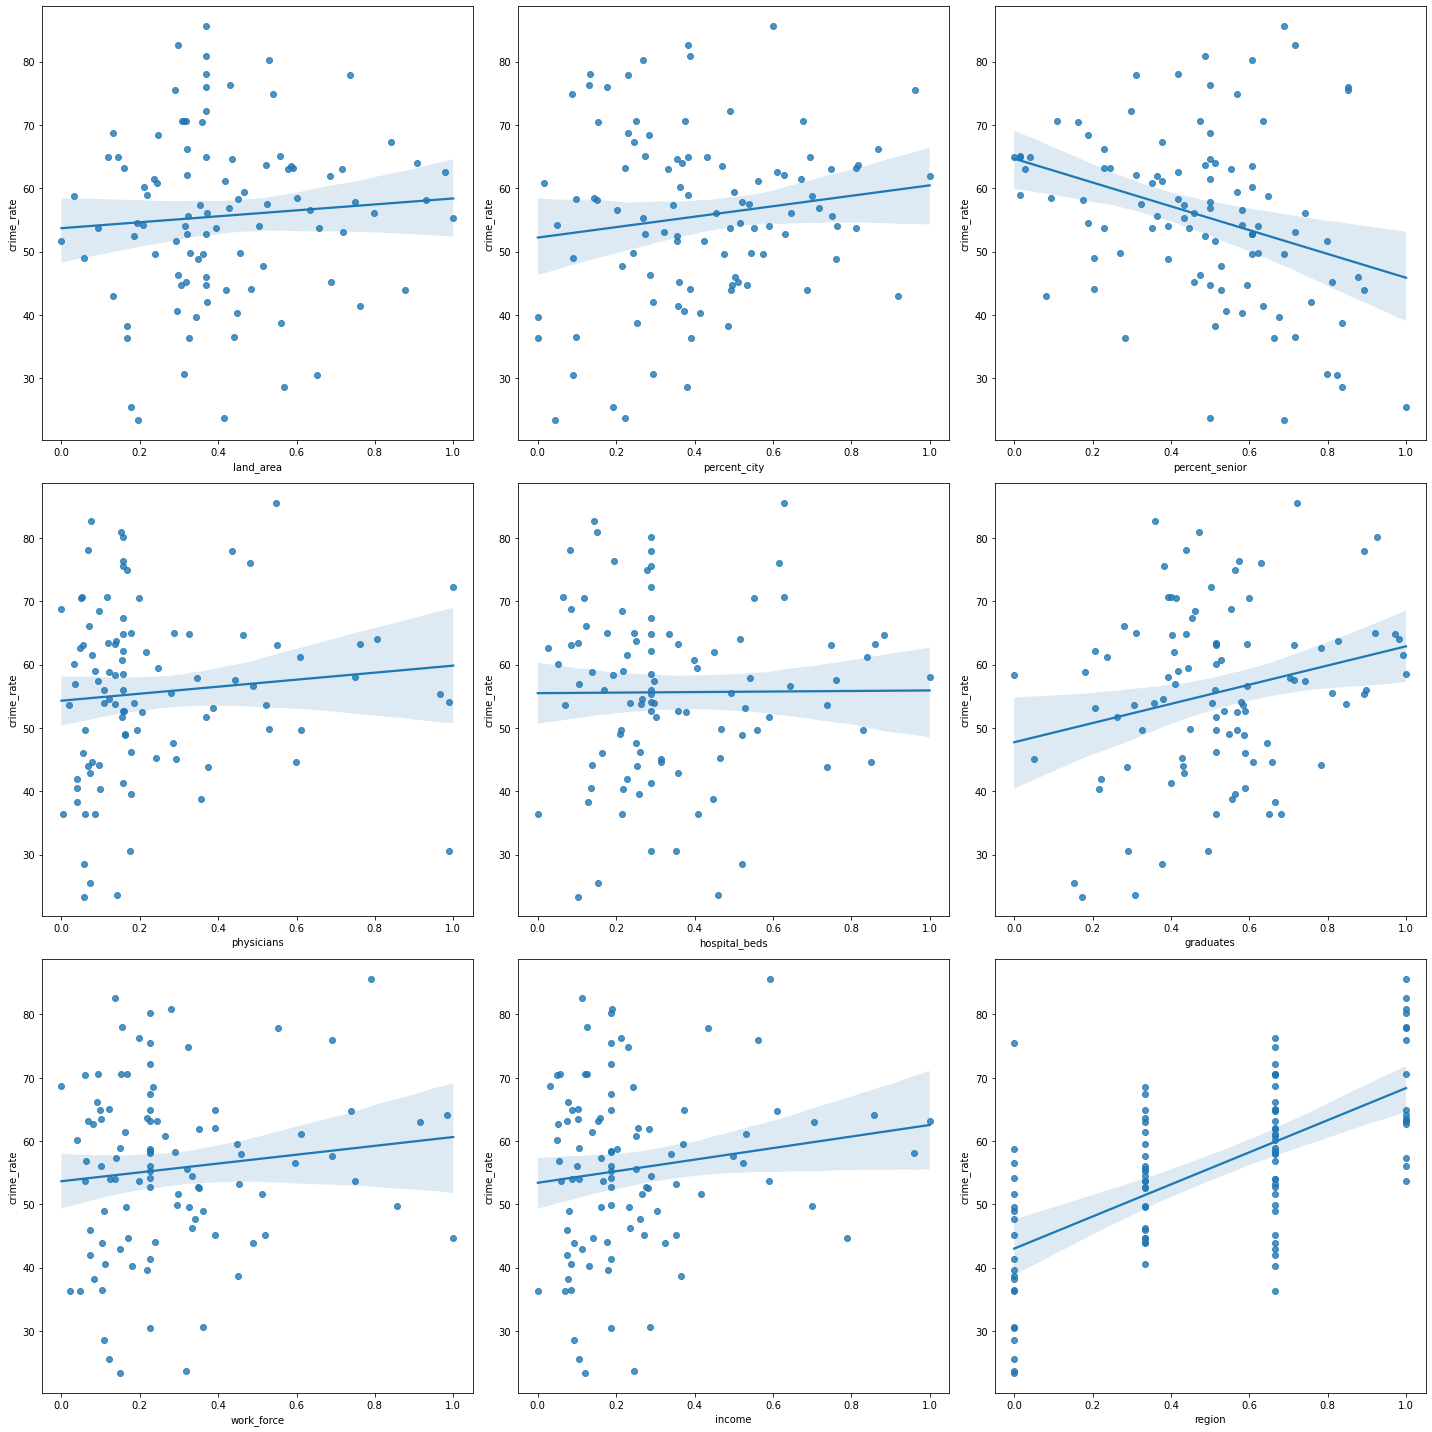

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = metropolitan_dataset['crime_rate'], x = x['land_area'], ax = axs[0, 0])
sns.regplot(y = metropolitan_dataset['crime_rate'], x = x['percent_city'], ax = axs[0, 1])
sns.regplot(y = metropolitan_dataset['crime_rate'], x = x['percent_senior'], ax = axs[0, 2])
sns.regplot(y = metropolitan_dataset['crime_rate'], x = x['physicians'], ax = axs[1, 0])
sns.regplot(y = metropolitan_dataset['crime_rate'], x = x['hospital_beds'], ax = axs[1, 1])
sns.regplot(y = metropolitan_dataset['crime_rate'], x = x['graduates'], ax = axs[1, 2])
sns.regplot(y = metropolitan_dataset['crime_rate'], x = x['work_force'], ax = axs[2, 0])
sns.regplot(y = metropolitan_dataset['crime_rate'], x = x['income'], ax = axs[2, 1])
sns.regplot(y = metropolitan_dataset['crime_rate'], x = x['region'], ax = axs[2, 2])
plt.tight_layout()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

X = metropolitan_dataset.drop('crime_rate', axis=1)
y = metropolitan_dataset['crime_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)
X_train.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
19,3341.0,35.8,10.1,2289.0,7593.0,59.9,656.3,9106.0,2.0
14,4226.0,38.1,9.8,3285.0,5392.0,67.8,699.8,10918.0,4.0
92,471.0,46.3,8.6,219.0,1128.0,47.8,105.3,1458.0,2.0
73,1758.0,56.8,11.5,565.0,2081.0,65.3,131.2,1939.0,4.0
39,1490.0,33.1,11.9,827.0,3818.0,47.4,300.2,4144.0,1.0


In [34]:
#Model Building
model = LinearRegression(normalize = True)
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [35]:
print("Model intercept : ", model.intercept_, "\n")
print("Model coefficient: ", model.coef_, "\n")

for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept :  32.36037633874082 

Model coefficient:  [ 2.47152433e-04 -1.66432897e-01 -1.79888540e+00  1.72583553e-03
 -5.77152610e-04  4.23190369e-01 -3.20824790e-03  1.04073421e-03
  8.43560242e+00] 

land_area :  0.0002471524328503981
percent_city :  -0.16643289682534776
percent_senior :  -1.7988854020317007
physicians :  0.0017258355313518852
hospital_beds :  -0.0005771526103183985
graduates :  0.4231903687499663
work_force :  -0.003208247904703514
income :  0.0010407342089953026
region :  8.435602417922427


In [36]:
# Model evaluation for testing set
test_y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, test_y_pred)))
r2 = r2_score(y_test, test_y_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = test_y_pred[0:10]
output['Difference'] = output['Predicted'] - output['crime_rate']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

    crime_rate  Predicted  Difference
20       85.62  69.496554  -16.123446
2        41.32  39.456018   -1.863982
15       44.64  54.733698   10.093698
22       61.15  58.510182   -2.639818
57       58.97  62.980169    4.010169
90       56.87  52.728848   -4.141152
69       53.97  52.223309   -1.746691
55       58.79  32.645854  -26.144146
11       52.73  50.373475   -2.356525
78       41.98  51.200618    9.220618 

Model testing performance:
--------------------------
RMSE is 13.632479424821433
R2 score is -0.2587385662750681


In [38]:
# Model evaluation for testing set
test_y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, test_y_pred)))
r2 = r2_score(y_test, test_y_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = test_y_pred[0:10]
output['Difference'] = output['Predicted'] - output['crime_rate']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

    crime_rate  Predicted  Difference
20       85.62  69.496554  -16.123446
2        41.32  39.456018   -1.863982
15       44.64  54.733698   10.093698
22       61.15  58.510182   -2.639818
57       58.97  62.980169    4.010169
90       56.87  52.728848   -4.141152
69       53.97  52.223309   -1.746691
55       58.79  32.645854  -26.144146
11       52.73  50.373475   -2.356525
78       41.98  51.200618    9.220618 

Model testing performance:
--------------------------
RMSE is 13.632479424821433
R2 score is -0.2587385662750681
